In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [170]:
df = pd.read_csv("games_original.csv")
df 

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [171]:
print("(rows, columns) : ")
print(df.shape)

(rows, columns) : 
(20058, 16)


 - `df.info()` allow us to see the missing values in the dataframe.
Here we can see that we miss values in `Teacher_Quality`, `Parental_Education_Level` and `Distance_from_Home`

In [172]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
None


# Features
 - Feature (Variable, Attribute): A column in a dataset, representing a measurable property or characteristic of the data
 - `df.columns` allows us to get the dataset features list 

In [173]:
features = df.columns
if 'index' in features:
    features.remove('index')
print("Features list :") 
for f in features:
    print(" - ", f)

Features list :
 -  id
 -  rated
 -  created_at
 -  last_move_at
 -  turns
 -  victory_status
 -  winner
 -  increment_code
 -  white_id
 -  white_rating
 -  black_id
 -  black_rating
 -  moves
 -  opening_eco
 -  opening_name
 -  opening_ply


## Correlation Matrix

First, to understand the relationship between the features, we can use the correlation matrix.
for the matrix to be relevant, we need to have only numerical features.
We can change the type of the features that we are going to store in a new dataframe.

In [174]:
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()


Let us create some function to plot some interesting information about the features.

In [175]:
def plot_distribution(df, feature,kde = False):
    plt.figure(figsize=(10, 6))
    if kde :
        sns.kdeplot(data =df , x = df[feature],shade=True, kde=kde)
    else :
        sns.countplot(data=df, x=feature, hue=feature, palette='coolwarm')
    plt.title(f"Distribution of {feature} vs Unrated Games")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f"{feature} distribution")
    plt.show()

Let us analyze the features 1 by 1 :

## 1. id

  - *Data Type* : string
  - *Description* : The id of the game
    
We can see that some of the game ids are duplicated. We can check if the rows are identical and if they are we can drop the duplicates.

Not interesting for the analysis. It is just an identifier.

In [176]:
feature = features[0]
df[feature].describe()

count        20058
unique       19113
top       XRuQPSzH
freq             5
Name: id, dtype: object

In [177]:
# Check if the id is duplicated
print("Number of duplicated ids : ", df[feature].duplicated().sum())

# Check if the rows are identical
print("Number of duplicated rows : ", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)
df

# 

Number of duplicated ids :  945
Number of duplicated rows :  429


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


As we will see in [3. Timestamps](#3.%20Timestamps), some of the timestamp in the dataset are more precise than others. To avoid the bias of the less precise timestamps, we will keep the most precise ones.

In [178]:
# Function to determine the precision of a timestamp
def timestamp_precision(timestamp):
    return len(str(timestamp).split('.')[1]) if '.' in str(timestamp) else 0

# Function to keep the most precise row
def keep_most_precise(df):
    # Sort by game ID and precision of timestamps
    df['created_at_precision'] = df['created_at'].apply(timestamp_precision)
    df['last_move_at_precision'] = df['last_move_at'].apply(timestamp_precision)
    df['total_precision'] = df['created_at_precision'] + df['last_move_at_precision']
    
    # Sort by game ID and total precision, then drop duplicates keeping the most precise
    df = df.sort_values(by=['id', 'total_precision'], ascending=[True, False])
    df = df.drop_duplicates(subset='id', keep='first')
    
    # Drop the precision columns
    df = df.drop(columns=['created_at_precision', 'last_move_at_precision', 'total_precision'])
    
    # sort by index
    df = df.sort_index()
    
    return df

# Apply the function to keep the most precise rows
df = keep_most_precise(df)

# Save the cleaned dataset
df.to_csv('games_cleaned.csv', index=False)
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


## 2. rated
- *Data Type* : binary
- *Description* : Whether the game is rated or not

Might be interesting. To train our AI model we might consider only the rated games to avoid the bias of unrated games.

In [179]:
feature = features[1]
df[feature].describe()

count     19113
unique        2
top        True
freq      15467
Name: rated, dtype: object

We can see that the feature is binary. Let us see the distribution of the values.

In [180]:
print(df[feature].value_counts())


rated
True     15467
False     3646
Name: count, dtype: int64


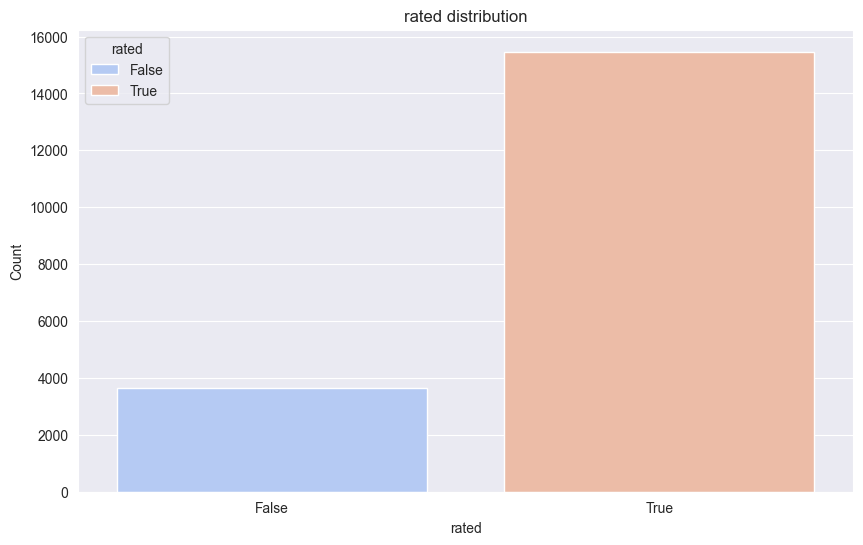

In [181]:
plot_distribution(df, feature)

## 3. Timestamps
- *Data Type* : datetime
- *Description* : The date of the creation of the game and the last move
- *Note* : We can extract the time difference between the two dates to get the duration of the game however we think that half of the values provided in the dataset are rounded which makes the features less relevant.

In [182]:
feature = features[2]
print(df[feature].describe()) 
feature = features[3]
print(df[feature].describe())

print()

count    1.911300e+04
mean     1.483413e+12
std      2.833975e+10
min      1.376772e+12
25%      1.476910e+12
50%      1.495670e+12
75%      1.503080e+12
max      1.504493e+12
Name: created_at, dtype: float64
count    1.911300e+04
mean     1.483414e+12
std      2.833964e+10
min      1.376772e+12
25%      1.476912e+12
50%      1.495670e+12
75%      1.503080e+12
max      1.504494e+12
Name: last_move_at, dtype: float64



If we explore the csv file we can notice that the first rows of the dataset has a very less precise timestamp than the last rows. That explains the fact that, when doing the difference between the two timestamps, we get a lot of 0 values.

In [160]:
time_differece = df['last_move_at'] - df["created_at"]
time_differece.describe()

count    1.911300e+04
mean     8.734540e+05
std      4.927361e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.972880e+05
75%      7.810520e+05
max      6.058447e+08
dtype: float64

In [161]:
time_df = df[['created_at', 'last_move_at']].copy()
time_df.loc[:, 'created_at'] = time_df['created_at']
time_df.loc[:, 'last_move_at'] = time_df['last_move_at']

# Now convert to datetime
time_df['created_at'] = pd.to_datetime(time_df['created_at'], unit='ms')
time_df['last_move_at'] = pd.to_datetime(time_df['last_move_at'], unit='ms')

# Verify the changes
print(time_df['created_at'].head())
print(time_df['last_move_at'].head())

0   2017-08-31 20:06:40
1   2017-08-30 21:53:20
2   2017-08-30 21:53:20
3   2017-08-30 16:20:00
4   2017-08-29 18:06:40
Name: created_at, dtype: datetime64[ns]
0   2017-08-31 20:06:40
1   2017-08-30 21:53:20
2   2017-08-30 21:53:20
3   2017-08-30 16:20:00
4   2017-08-29 18:06:40
Name: last_move_at, dtype: datetime64[ns]


In [162]:
time_differece = time_df['last_move_at'] - time_df['created_at']
print(time_differece.tail())
time_differece.describe()

20053   0 days 00:05:21.734000
20054   0 days 00:12:24.219000
20055   0 days 00:02:52.834000
20056   0 days 00:15:46.699000
20057   0 days 00:12:16.699000
dtype: timedelta64[ns]


count                        19113
mean     0 days 00:14:33.454022654
std      0 days 01:22:07.360503480
min                0 days 00:00:00
25%                0 days 00:00:00
50%         0 days 00:03:17.288000
75%         0 days 00:13:01.052000
max         7 days 00:17:24.701000
dtype: object